<a href="https://colab.research.google.com/github/ScienceTrader/ProjetoRompimentoMQL5/blob/main/Filtro_Swing_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filtrar ações do ibovespa em que a média de 20 esteja acima da média de 200 e tenha fechado candle positivo ou candle 2 negativo e candle 1 positivo


*   Primeiro Filtro = Volume acima de 1000000
*   Segundo Filtro = Medias
*   Terceiro Filtro = Formação de Candle







In [72]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Criando a lista de ações
lista_tickers = ["RRRP3.SA", "AESB3.SA", "AERI3.SA", "AGXY3.SA", "ALSO3.SA", "ALLD3.SA", "ALPK3.SA", "APER3.SA", "AVLL3.SA", "AMBP3.SA", "AMER3.SA", "ANIM3.SA", "ARZZ3.SA", "ARML3.SA", "CRFB3.SA", "ATMP3.SA", "AURE3.SA", "B3SA3.SA", "MODL3.SA", "BBSE3.SA", "BBAS3.SA", "BMOB3.SA", "BLAU3.SA", "SOJA3.SA", "BOAS3.SA", "BRML3.SA", "BRPR3.SA", "AGRO3.SA", "BRFS3.SA", "BRIT3.SA", "CXSE3.SA", "CAML3.SA", "CCRO3.SA", "CEAB3.SA", "AALR3.SA", "PCAR3.SA", "SBSP3.SA", "CSMG3.SA", "CIEL3.SA", "CLSA3.SA", "VVEO3.SA", "COGN3.SA"]
lista_tickers

In [116]:
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')
tickers = "RRRP3.SA AESB3.SA AERI3.SA AGXY3.SA ALSO3.SA ALLD3.SA ALPK3.SA APER3.SA AVLL3.SA AMBP3.SA AMER3.SA ANIM3.SA ARZZ3.SA ARML3.SA CRFB3.SA ATMP3.SA AURE3.SA B3SA3.SA MODL3.SA BBSE3.SA BBAS3.SA BMOB3.SA BLAU3.SA SOJA3.SA BOAS3.SA BRML3.SA BRPR3.SA AGRO3.SA BRFS3.SA BRIT3.SA CXSE3.SA CAML3.SA CCRO3.SA CEAB3.SA AALR3.SA PCAR3.SA SBSP3.SA CSMG3.SA CIEL3.SA CLSA3.SA VVEO3.SA COGN3.SA"
dados_diarios = yf.download(tickers=tickers, period="1y", interval="1d", group_by=tickers)
dados_diarios.dropna(inplace=True)
dados_diarios

[*********************100%***********************]  42 of 42 completed


CLSA3.SA                                        \
                              Open  High   Low Close Adj Close    Volume   
Date                                                                       
2022-03-28 00:00:00-03:00     5.89  6.03  5.35  5.62      5.62  19799700   
2022-03-29 00:00:00-03:00     5.70  6.19  5.42  6.19      6.19   7129600   
2022-03-30 00:00:00-03:00     6.30  6.34  5.81  5.94      5.94   4555600   
2022-03-31 00:00:00-03:00     5.95  5.98  5.68  5.89      5.89   2005700   
2022-04-01 00:00:00-03:00     5.96  6.48  5.91  6.41      6.41   4389000   
...                            ...   ...   ...   ...       ...       ...   
2022-10-05 00:00:00-03:00     6.01  6.27  5.85  6.26      6.26    509000   
2022-10-06 00:00:00-03:00     6.20  6.42  6.18  6.38      6.38    738000   
2022-10-07 00:00:00-03:00     6.42  6.42  6.29  6.35      6.35    756300   
2022-10-10 00:00:00-03:00     6.35  6.35  6.07  6.16      6.16    720500   
2022-10-11 00:00:00-03:00     6.13  6.23  5.82  6.15      6.15    643000   

                            ALSO3.SA                                   ...  \
                                Open       High        Low      Close  ...   
Date                                                                   ...   
2022-03-28 00:00:00-03:00  23.000000  23.160000  22.629999  22.870001  ...   
2022-03-29 00:00:00-03:00  23.150000  23.750000  22.980000  23.700001  ...   
2022-03-30 00:00:00-03:00  24.090000  24.309999  23.240000  23.299999  ...   
2022-03-31 00:00:00-03:00  23.129999  23.700001  23.129999  23.139999  ...   
2022-04-01 00:00:00-03:00  23.280001  23.930000  23.250000  23.910000  ...   
...                              ...        ...        ...        ...  ...   
2022-10-05 00:00:00-03:00  20.990000  21.440001  20.780001  21.139999  ...   
2022-10-06 00:00:00-03:00  21.280001  21.440001  21.010000  21.100000  ...   
2022-10-07 00:00:00-03:00  20.959999  21.230000  20.940001  21.000000  ...   
2022-10-10 00:00:00-03:00  21.040001  21.170000  20.840000  21.000000  ...   
2022-10-11 00:00:00-03:00  20.860001  21.219999  20.860001  21.030001  ...   

                          ALPK3.SA                         BRIT3.SA        \
                               Low Close Adj Close  Volume     Open  High   
Date                                                                        
2022-03-28 00:00:00-03:00     4.28  4.28      4.28   21600     3.64  3.73   
2022-03-29 00:00:00-03:00     4.28  4.28      4.28   36600     3.79  4.04   
2022-03-30 00:00:00-03:00     4.28  4.28      4.28   13500     3.90  4.09   
2022-03-31 00:00:00-03:00     4.20  4.29      4.29   27200     3.92  4.00   
2022-04-01 00:00:00-03:00     4.29  4.51      4.51   30200     4.01  4.12   
...                            ...   ...       ...     ...      ...   ...   
2022-10-05 00:00:00-03:00     2.20  2.23      2.23   10700     3.34  3.38   
2022-10-06 00:00:00-03:00     2.23  2.28      2.28   40600     3.19  3.40   
2022-10-07 00:00:00-03:00     2.22  2.22      2.22  119900     3.38  3.54   
2022-10-10 00:00:00-03:00     2.11  2.12      2.12  111100     3.40  3.45   
2022-10-11 00:00:00-03:00     2.07  2.08      2.08   90500     3.45  3.71   

                                                         
                            Low Close Adj Close  Volume  
Date                                                     
2022-03-28 00:00:00-03:00  3.56  3.73  3.728618  417100  
2022-03-29 00:00:00-03:00  3.75  3.97  3.968529  561500  
2022-03-30 00:00:00-03:00  3.85  3.87  3.868566  391800  
2022-03-31 00:00:00-03:00  3.76  4.00  3.998518  402100  
2022-04-01 00:00:00-03:00  3.93  3.97  3.968529  467500  
...                         ...   ...       ...     ...  
2022-10-05 00:00:00-03:00  3.19  3.19  3.190000  367700  
2022-10-06 00:00:00-03:00  3.18  3.37  3.370000  235700  
2022-10-07 00:00:00-03:00  3.25  3.32  3.320000  489300  
2022-10-10 00:00:00-03:00  3.27  3.45  3.450000  303000  
2022-10-11 00:00:00-03:00  3.40  3.

In [105]:
lista_volume = []
for i in lista_tickers:
  if dados_diarios[i]['Volume'].iloc[-1] > 1000000:
    lista_volume.append(i)
lista_volume

['RRRP3.SA',
 'AESB3.SA',
 'AERI3.SA',
 'ALSO3.SA',
 'AMBP3.SA',
 'AMER3.SA',
 'ANIM3.SA',
 'ARZZ3.SA',
 'CRFB3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'MODL3.SA',
 'BBSE3.SA',
 'BBAS3.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'BRFS3.SA',
 'CXSE3.SA',
 'CAML3.SA',
 'CCRO3.SA',
 'CEAB3.SA',
 'PCAR3.SA',
 'SBSP3.SA',
 'CSMG3.SA',
 'CIEL3.SA',
 'COGN3.SA']

In [106]:
dataFrame_volume = pd.DataFrame(lista_volume,columns=['Empresa'])
dataFrame_volume

,Empresa
0,RRRP3.SA
1,AESB3.SA
2,AERI3.SA
3,ALSO3.SA
4,AMBP3.SA
5,AMER3.SA
6,ANIM3.SA
7,ARZZ3.SA
8,CRFB3.SA
9,AURE3.SA


In [ ]:
#Verificar se formou candle
if dados_diarios['Close'].iloc[-2] < dados_diarios['Open'].iloc[-2] and dados_diarios['Close'].iloc[-1] > dados_diarios['Open'].iloc[-1]:
  print('Reversão')
else:
  print('Queda')

Queda


VERIFICAR SE PREÇO SE ENCONTRA ACIMA DAS MÉDIAS

In [13]:
#Media de 20 períodos
Media20 = dados_diarios.Close.ewm(span=5, adjust = False).mean()

In [127]:
lista_media = []
for j in lista_tickers:
  media = dados_diarios[j]['Close'].ewm(span=20, adjust=False).mean()
  if dados_diarios[j]['Close'].iloc[-1] > media[-1]:
    lista_media.append(j)
lista_media

['RRRP3.SA',
 'AESB3.SA',
 'AGXY3.SA',
 'ALSO3.SA',
 'AMBP3.SA',
 'AMER3.SA',
 'ANIM3.SA',
 'ARZZ3.SA',
 'ATMP3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BMOB3.SA',
 'SOJA3.SA',
 'BRML3.SA',
 'AGRO3.SA',
 'BRFS3.SA',
 'BRIT3.SA',
 'CEAB3.SA',
 'SBSP3.SA',
 'CSMG3.SA',
 'CIEL3.SA',
 'CLSA3.SA',
 'VVEO3.SA',
 'COGN3.SA']

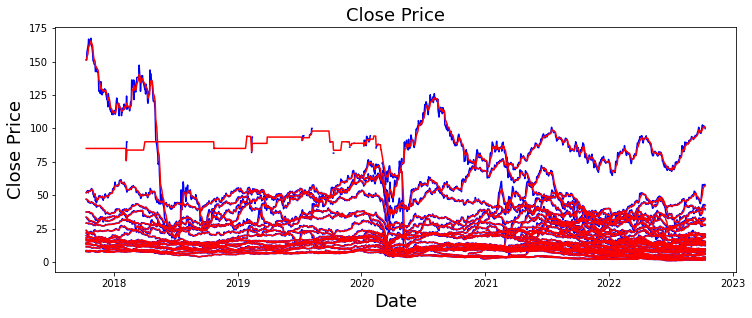

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(dados_diarios['Close'], label = 'Close Price', color = 'blue')
plt.plot(Media20, label = 'Media de 20', color = 'red')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
dados_semanais = yf.download(tickers=tickers, period="5y", interval="1wk")['Adj Close']
dados_semanais.dropna(inplace=True)
dados_semanais

[*********************100%***********************]  5 of 5 completed


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2017-09-04,17.436874,7.009758,6.908557,23.860638,7.557942
2017-09-11,18.616678,7.336703,7.375926,23.390070,8.183898
2017-09-18,18.668734,7.277854,7.987753,22.082165,7.854823
2017-09-25,18.252327,7.212463,6.611141,22.054487,7.654518
2017-10-02,18.278355,7.408631,7.945265,22.241325,7.937091
...,...,...,...,...,...
2022-08-08,15.210000,9.356553,9.510000,66.360504,30.900000
2022-08-15,15.660000,9.316907,9.050000,66.959999,29.850000
2022-08-22,15.670000,9.325956,8.670000,68.230003,28.809999


In [ ]:
dados_mensais = yf.download(tickers=tickers, start="2015-01-01", end="2022-09-01", interval="1mo")['Adj Close']
dados_mensais.dropna(inplace=True) 
dados_mensais

[*********************100%***********************]  5 of 5 completed


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-01-01,13.304616,4.158330,2.831017,11.755996,5.390501
2015-02-01,14.735954,4.601145,3.490179,13.423694,5.138452
2015-03-01,14.872768,4.644208,4.200046,11.332754,5.377810
2015-04-01,15.326362,4.944730,5.045126,14.308076,5.439940
2015-05-01,14.986679,4.521562,4.333782,13.085618,5.799440
...,...,...,...,...,...
2022-04-01,14.520000,9.106189,10.730567,79.185760,29.897303
2022-05-01,14.190000,9.481906,10.960000,81.961868,25.199156
2022-06-01,13.400000,8.245995,8.650000,72.787384,26.271881
